In [1]:
from lbmpy.session import *
from lbmpy.phasefield.scenarios import *
import pystencils as ps
from pystencils.fd.derivation import *

# 2D standard stencils


In [13]:
stencil = [(-1, 0), (1, 0), (0, -1), (0, 1), (0, 0)]
standard_2d_00 = FiniteDifferenceStencilDerivation((0,0), stencil)
f = ps.fields("f: [2D]")
standard_2d_00_res = standard_2d_00.get_stencil()
res = standard_2d_00_res.apply(f.center)
expected = f[-1, 0] - 2 * f[0, 0] + f[1, 0]
assert res == expected

In [16]:
assert standard_2d_00_res.accuracy == 2
assert not standard_2d_00_res.is_isotropic
standard_2d_00_res

Finite difference stencil of accuracy 2, isotropic error: False

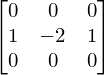

In [17]:
standard_2d_00.get_stencil().as_matrix()

# 2D isotropic stencils

## second x-derivative

In [19]:
stencil = get_stencil("D2Q9")
isotropic_2d_00 = FiniteDifferenceStencilDerivation((0,0), stencil)
isotropic_2d_00_res = isotropic_2d_00.get_stencil(isotropic=True)
assert isotropic_2d_00_res.is_isotropic
assert isotropic_2d_00_res.accuracy == 2
isotropic_2d_00_res

Finite difference stencil of accuracy 2, isotropic error: True

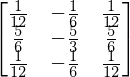

In [20]:
isotropic_2d_00_res.as_matrix()

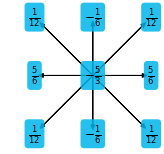

In [21]:
plt.figure(figsize=(2,2))
isotropic_2d_00_res.visualize()

In [22]:
expected_result = sp.Matrix([[1, -2, 1], [10, -20, 10], [1, -2, 1]]) / 12
assert expected_result == isotropic_2d_00_res.as_matrix()

## Isotropic laplacian

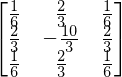

In [23]:
isotropic_2d_11 = FiniteDifferenceStencilDerivation((1,1), stencil)
isotropic_2d_11_res = isotropic_2d_11.get_stencil(isotropic=True)
iso_laplacian = isotropic_2d_00_res.as_matrix() + isotropic_2d_11_res.as_matrix()
iso_laplacian

In [24]:
expected_result = sp.Matrix([[1, 4, 1], [4, -20, 4], [1, 4, 1]]) / 6
assert iso_laplacian == expected_result